In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import glob
import cv2
import os
import seaborn as sns
import pandas as pd
from skimage.filters import sobel,roberts, scharr, prewitt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from skimage.filters import sobel
from skimage.feature import graycomatrix, graycoprops
from skimage.measure import shannon_entropy
import xarray as xr



In [3]:
#Resize images to
SIZE = 128

#Capturing images and labels into arrays.
train_images = []
train_labels = [] 
for directory_path in glob.glob("/content/drive/MyDrive/data3a/training/*"):
    label = directory_path.split("-")[-1]
    print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.JPEG")):
        img = cv2.imread(img_path, cv2.IMREAD_COLOR) #Reading color images
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  
        img = cv2.resize(img, (SIZE, SIZE)) #Resizing images
        train_images.append(img)
        train_labels.append(label)

    for img_path in glob.glob(os.path.join(directory_path, "*.jpeg")):
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  
        img = cv2.resize(img, (SIZE, SIZE)) 
        train_images.append(img)
        train_labels.append(label)

    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  
        img = cv2.resize(img, (SIZE, SIZE))
        train_images.append(img)
        train_labels.append(label)
        
train_images = np.array(train_images)
train_labels = np.array(train_labels)

minor
moderate
severe


In [4]:
#Resize images to
SIZE = 128

#Capturing images and labels into arrays.
train_images = []
train_labels = [] 
for directory_path in glob.glob("/content/drive/MyDrive/data3a/training/*"):
    label = directory_path.split("-")[-1]
    print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.JPEG")):
        img = cv2.imread(img_path, 0) #Reading color images
        img = cv2.resize(img, (SIZE, SIZE)) #Resizing images
        train_images.append(img)
        train_labels.append(label)

        
    for img_path in glob.glob(os.path.join(directory_path, "*.jpeg")):
        img = cv2.imread(img_path, 0)
        img = cv2.resize(img, (SIZE, SIZE)) 
        train_images.append(img)
        train_labels.append(label)

    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        img = cv2.imread(img_path, 0)
        img = cv2.resize(img, (SIZE, SIZE))
        train_images.append(img)
        train_labels.append(label)
        
train_images = np.array(train_images)
train_labels = np.array(train_labels)

minor
moderate
severe


In [5]:
img.shape

(128, 128)

In [6]:
#Test images
test_images = []
test_labels = [] 
for directory_path in glob.glob("/content/drive/MyDrive/data3a/validation/*"):
    test_label = directory_path.split("-")[-1]
    print(test_label)
    for img_path in glob.glob(os.path.join(directory_path, "*.JPEG")):
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  

        img = cv2.resize(img, (SIZE, SIZE))
        test_images.append(img)
        test_labels.append(test_label)
    for img_path in glob.glob(os.path.join(directory_path, "*.jpeg")):
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  

        img = cv2.resize(img, (SIZE, SIZE))
        test_images.append(img)
        test_labels.append(test_label)
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  

        img = cv2.resize(img, (SIZE, SIZE))
        test_images.append(img)
        test_labels.append(test_label)

test_images = np.array(test_images)
test_labels = np.array(test_labels)

minor
severe
moderate


In [7]:
train_images.shape,train_labels.shape

((1383, 128, 128), (1383,))

In [8]:
test_images.shape,test_labels.shape

((248, 128, 128), (248,))

In [9]:
#Label Encoding
le = preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)
le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)

In [10]:
# Normalizing pixel values to between 0 and 1
# x_train, x_test = x_train / 255.0, x_test / 255.0

In [11]:
#Spliting data into train, validation and test datasets 
x_train, x_val,y_train, y_val = train_test_split(train_images, train_labels_encoded, test_size=0.30, random_state=1)
x_test, y_test = test_images, test_labels_encoded


In [12]:
x_train.shape , y_train.shape , x_val.shape , y_val.shape , x_test.shape , y_test.shape

((968, 128, 128), (968,), (415, 128, 128), (415,), (248, 128, 128), (248,))

In [13]:
# df = pd.DataFrame(
#                        x_train.reshape((-1, x_train.shape[-1])), 
#                        index= pd.MultiIndex.from_product(
#                           [range(x_train.shape[0]), range(x_train.shape[1])]
#                           )
#                       ).to_csv('/content/sample_data_x_train.csv')

In [14]:
# # df = pd.DataFrame(
# #                        y_train.reshape((-1, y_train.shape[-1])), 
# #                        index= pd.MultiIndex.from_product(
# #                           [range(y_train.shape[0]), range(y_train.shape[1])]
# #                           )
# #                       ).to_csv('/content/sample_data_y_train.csv')

# df = pd.DataFrame(y_train)
# df.to_csv('/content/sample_data_y_train.csv', index=False)  


In [15]:
# df = pd.DataFrame(
#                        x_val.reshape((-1, x_val.shape[-1])), 
#                        index= pd.MultiIndex.from_product(
#                           [range(x_val.shape[0]), range(x_val.shape[1])]
#                           )
#                       ).to_csv('/content/sample_data_x_val.csv')

In [16]:
# # df = pd.DataFrame(
# #                        y_val.reshape((-1, y_val.shape[-1])), 
# #                        index= pd.MultiIndex.from_product(
# #                           [range(y_val.shape[0]), range(y_val.shape[1])]
# #                           )
# #                       ).to_csv('/content/sample_data_y_val.csv')

# df = pd.DataFrame(y_val)
# df.to_csv('/content/sample_data_y_val.csv', index=False)  


In [17]:
# df = pd.DataFrame(
#                        x_test.reshape((-1, x_test.shape[-1])), 
#                        index= pd.MultiIndex.from_product(
#                           [range(x_test.shape[0]), range(x_test.shape[1])]
#                           )
#                       ).to_csv('/content/sample_data_x_test.csv')

In [18]:
# # df = pd.DataFrame(
# #                        y_test.reshape((-1, y_test.shape[-1])), 
# #                        index= pd.MultiIndex.from_product(
# #                           [range(y_test.shape[0]), range(y_test.shape[1])]
# #                           )
# #                       ).to_csv('/content/sample_data_y_test.csv')

# df = pd.DataFrame(y_test)
# df.to_csv('/content/sample_data_y_test.csv', index=False)  


In [19]:
# df = pd.read_csv('/content/sample_data/sample_data_x_train.csv', header=None, index_col=[0,1])
# np.array(df.agg(list, 1).groupby(level=0).agg(list).tolist())

In [20]:
###################################################################
# FEATURE EXTRACTOR function
# input shape is (n, x, y, c) - number of images, x, y, and channels
def feature_extractor(dataset):
    image_dataset = pd.DataFrame()
    for image in range(dataset.shape[0]):  #iterate through each file 
        #print(image)
        
        df = pd.DataFrame()  #Temporary data frame to capture information for each loop.
        #Reset dataframe to blank after each loop.
        
        img = dataset[image, :,:]
    ################################################################
    #START ADDING DATA TO THE DATAFRAME
  
                
         #Full image
        #GLCM = graycomatrix(img, [1], [0, np.pi/4, np.pi/2, 3*np.pi/4])
        GLCM = graycomatrix(img, [1], [0])       
        GLCM_Energy = graycoprops(GLCM, 'energy')[0]
        df['Energy'] = GLCM_Energy
        GLCM_corr = graycoprops(GLCM, 'correlation')[0]
        df['Corr'] = GLCM_corr       
        GLCM_diss = graycoprops(GLCM, 'dissimilarity')[0]
        df['Diss_sim'] = GLCM_diss       
        GLCM_hom = graycoprops(GLCM, 'homogeneity')[0]
        df['Homogen'] = GLCM_hom       
        GLCM_contr = graycoprops(GLCM, 'contrast')[0]
        df['Contrast'] = GLCM_contr


        GLCM2 = graycomatrix(img, [3], [0])       
        GLCM_Energy2 = graycoprops(GLCM2, 'energy')[0]
        df['Energy2'] = GLCM_Energy2
        GLCM_corr2 = graycoprops(GLCM2, 'correlation')[0]
        df['Corr2'] = GLCM_corr2       
        GLCM_diss2 = graycoprops(GLCM2, 'dissimilarity')[0]
        df['Diss_sim2'] = GLCM_diss2       
        GLCM_hom2 = graycoprops(GLCM2, 'homogeneity')[0]
        df['Homogen2'] = GLCM_hom2       
        GLCM_contr2 = graycoprops(GLCM2, 'contrast')[0]
        df['Contrast2'] = GLCM_contr2

        GLCM3 = graycomatrix(img, [5], [0])       
        GLCM_Energy3 = graycoprops(GLCM3, 'energy')[0]
        df['Energy3'] = GLCM_Energy3
        GLCM_corr3 = graycoprops(GLCM3, 'correlation')[0]
        df['Corr3'] = GLCM_corr3       
        GLCM_diss3 = graycoprops(GLCM3, 'dissimilarity')[0]
        df['Diss_sim3'] = GLCM_diss3       
        GLCM_hom3 = graycoprops(GLCM3, 'homogeneity')[0]
        df['Homogen3'] = GLCM_hom3       
        GLCM_contr3 = graycoprops(GLCM3, 'contrast')[0]
        df['Contrast3'] = GLCM_contr3

        GLCM4 = graycomatrix(img, [0], [np.pi/4])       
        GLCM_Energy4 = graycoprops(GLCM4, 'energy')[0]
        df['Energy4'] = GLCM_Energy4
        GLCM_corr4 = graycoprops(GLCM4, 'correlation')[0]
        df['Corr4'] = GLCM_corr4       
        GLCM_diss4 = graycoprops(GLCM4, 'dissimilarity')[0]
        df['Diss_sim4'] = GLCM_diss4       
        GLCM_hom4 = graycoprops(GLCM4, 'homogeneity')[0]
        df['Homogen4'] = GLCM_hom4       
        GLCM_contr4 = graycoprops(GLCM4, 'contrast')[0]
        df['Contrast4'] = GLCM_contr4
        
        GLCM5 = graycomatrix(img, [0], [np.pi/2])       
        GLCM_Energy5 = graycoprops(GLCM5, 'energy')[0]
        df['Energy5'] = GLCM_Energy5
        GLCM_corr5 = graycoprops(GLCM5, 'correlation')[0]
        df['Corr5'] = GLCM_corr5       
        GLCM_diss5 = graycoprops(GLCM5, 'dissimilarity')[0]
        df['Diss_sim5'] = GLCM_diss5       
        GLCM_hom5 = graycoprops(GLCM5, 'homogeneity')[0]
        df['Homogen5'] = GLCM_hom5       
        GLCM_contr5 = graycoprops(GLCM5, 'contrast')[0]
        df['Contrast5'] = GLCM_contr5
        
        #Add more filters as needed
        #entropy = shannon_entropy(img)
        #df['Entropy'] = entropy

        
        #Append features from current image to the dataset
        image_dataset= pd.concat([image_dataset, df], axis=0)
        
    return image_dataset

In [21]:
#Extract features from training images
image_features = feature_extractor(x_train)
X_for_ML_GLCM =image_features
X_for_ML_GLCM.shape

(968, 25)

In [22]:
X_for_ML_GLCM.to_csv('/content/sample_data_X_for_ML_GLCM.csv', index=False)  

In [23]:
# X_for_ML_GLCM = pd.read_csv('/content/sample_data/sample_data_X_for_ML_GLCM.csv')

In [24]:
# X_for_ML_GLCM.shape

In [25]:
#Define the classifier
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators = 50, random_state = 42)

In [26]:
#Can also use SVM but RF is faster and may be more accurate.
# from sklearn import svm
# SVM_model = svm.SVC(decision_function_shape='ovo')  #For multiclass classification


# Fit the model on training data
RF_model.fit(X_for_ML_GLCM, y_train) #For sklearn no one hot encoding
# SVM_model.fit(X_for_RF, y_train)



RandomForestClassifier(n_estimators=50, random_state=42)

In [27]:
#Predict on Test data
#Extract features from test data and reshape, just like training data
val_features = feature_extractor(x_val)
val_features = np.expand_dims(val_features, axis=0)
val_for_RF = np.reshape(val_features, (x_val.shape[0], -1))

In [28]:
type(val_for_RF), type(val_features)

(numpy.ndarray, numpy.ndarray)

In [ ]:
#Predict on Test data
#Extract features from test data and reshape, just like training data
val_features = feature_extractor(x_val)
val_features = np.expand_dims(val_features, axis=0)
val_for_RF = np.reshape(val_features, (x_val.shape[0], -1))
#Predict on test
val_prediction_RF = RF_model.predict(val_for_RF)
#Inverse le transform to get original label back. 
val_prediction_RF = le.inverse_transform(val_prediction_RF)
y_val_labels= le.inverse_transform(y_val)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [30]:
#Print overall accuracy
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(y_val_labels, val_prediction_RF))

Accuracy =  0.5277108433734939


<Axes: >

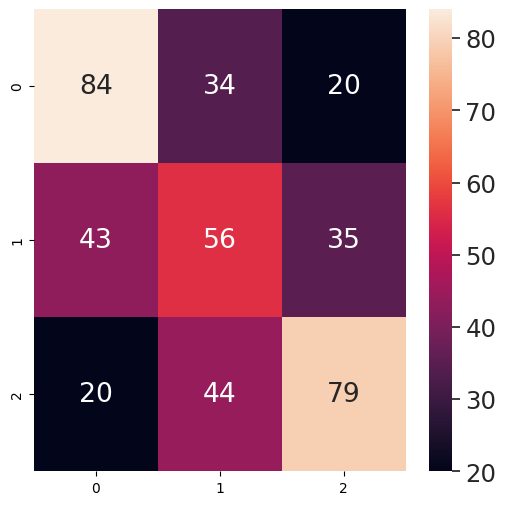

In [31]:
#Print confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_val_labels, val_prediction_RF)

fig, ax = plt.subplots(figsize=(6,6))         # Sample figsize in inches
sns.set(font_scale=1.6)
sns.heatmap(cm, annot=True, ax=ax)

In [32]:
# FEATURE EXTRACTOR function
# input shape is (n, x, y, c) - number of images, x, y, and channels
def feature_extractor(dataset):
    x_train = dataset
    image_dataset = pd.DataFrame()
    for image in range(x_train.shape[0]):  #Iterating through each file 
        
        df = pd.DataFrame()  #Temporary data frame to capture information for each loop.
        
        input_img = x_train[image, :,:]
        img = input_img

         # FEATURE 1 - Pixel values         
        #Adding pixel values to the data frame
        pixel_values = img.reshape(-1)
        df['Pixel_Value'] = pixel_values  
        # FEATURE 2 - Bunch of Gabor filter responses
        #Generating Gabor features
        num = 1 
        kernels = []
        for theta in range(2):   #Defining number of thetas
            theta = theta / 4. * np.pi
            for sigma in (1,3):  #Sigma with 1 and 3
                #lamda = np.pi/4
               for lamda in np.arange(0, np.pi, np.pi/6):   #Range of wavelengths
                      gamma = 1
                    # for gamma in (0.05, 0.5):   #Gamma values of 0.05 and 0.5            
                      gabor_label = 'Gabor' + str(num)  #Labelling Gabor columns as Gabor1, Gabor2, etc.
                      ksize=10
                      kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, 0, ktype=cv2.CV_32F)    
                      kernels.append(kernel)

                      fimg = cv2.filter2D(img, cv2.CV_8UC3, kernel)
                      filtered_img = fimg.reshape(-1)
                      df[gabor_label] = filtered_img  #Labeling columns as Gabor1, Gabor2, etc.
                      num += 1  #Iterate all over
        # #Generate Gabor features
        # num = 1  #To count numbers up in order to give Gabor features a lable in the data frame
        # kernels = []  #Create empty list to hold all kernels that we will generate in a loop
        # for theta in range(2):   #Define number of thetas. Here only 2 theta values 0 and 1/4 . pi 
        #     theta = theta / 4. * np.pi
        #     for sigma in (1, 3):  #Sigma with values of 1 and 3
        #         for lamda in np.arange(0, np.pi, np.pi / 4):   #Range of wavelengths
        #             for gamma in (0.05, 0.5):   #Gamma values of 0.05 and 0.5
                                  
        #                 gabor_label = 'Gabor' + str(num)  #Label Gabor columns as Gabor1, Gabor2, etc.
        #                 ksize=9
        #                 kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, 0, ktype=cv2.CV_32F)    
        #                 kernels.append(kernel)
        #                 #Now filter the image and add values to a new column 
        #                 fimg = cv2.filter2D(img, cv2.CV_8UC3, kernel)
        #                 filtered_img = fimg.reshape(-1)
        #                 df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
        #                 num += 1  #Increment for gabor column label
        
        #Append features from current image to the dataset
        image_dataset= pd.concat([image_dataset, df], axis=0)
        
    return image_dataset

In [33]:
# Normalizing pixel values to between 0 and 1
x_train,x_val = x_train / 255.0,x_val / 255.0

In [37]:
x_train

In [35]:
#Extracting features
image_features = feature_extractor(x_train)

In [36]:
image_features.shape

(15859712, 25)

In [37]:
#Reshaping to a vector for ML training
n_features = image_features.shape[1]
image_features = np.expand_dims(image_features, axis=0)
X_for_RF_GABOR = np.reshape(image_features, (x_train.shape[0], -1))  #Reshape to #images, features

In [38]:
X_for_RF_GABOR.shape

(968, 409600)

In [39]:
#Can also use SVM but RF is faster and may be more accurate.
# from sklearn import svm
# SVM_model = svm.SVC(decision_function_shape='ovo')  #For multiclass classification


# Fit the model on training data
RF_model.fit(X_for_RF_GABOR, y_train) #For sklearn no one hot encoding
# SVM_model.fit(X_for_RF, y_train)



RandomForestClassifier(n_estimators=50, random_state=42)

In [40]:
#Predict on Test data
#Extract features from test data and reshape, just like training data
val_features = feature_extractor(x_val) 
val_features = np.expand_dims(val_features, axis=0)
val_for_RF = np.reshape(val_features, (x_val.shape[0], -1))

In [41]:
#Predict on test
val_prediction_RF = RF_model.predict(val_for_RF)
#Inverse le transform to get original label back. 
val_prediction_RF = le.inverse_transform(val_prediction_RF)
y_val_labels= le.inverse_transform(y_val)

In [42]:
#Print overall accuracy
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(y_val_labels, val_prediction_RF))

Accuracy =  0.4819277108433735


In [48]:
X_for_RF_GABOR_df=pd.DataFrame(X_for_RF_GABOR)
# df.to_csv('/content/sample_data_X_for_RF_GABOR.csv', index=False)

In [49]:
type(X_for_ML_GLCM), type(X_for_RF_GABOR_df)

(pandas.core.frame.DataFrame, pandas.core.frame.DataFrame)

In [33]:
from sklearn.model_selection import RandomizedSearchCV

In [34]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)
{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [38]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_for_ML_GLCM, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [39]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': True}

In [45]:
image_features = feature_extractor(x_val)
X_for_ML_GLCM =image_features
X_for_ML_GLCM.shape

(415, 25)

In [47]:
y_val_labels.shape

(415,)

In [49]:
best_grid = rf_random.best_estimator_
best_grid.fit(X_for_ML_GLCM, y_val_labels)

RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=1000)

In [50]:
val_prediction_RF=best_grid.predict(X_for_ML_GLCM)
print ("Accuracy = ", metrics.accuracy_score(y_val_labels, val_prediction_RF))

Accuracy =  0.963855421686747


In [51]:
image_features = feature_extractor(x_test)
X_for_ML_GLCM =image_features
X_for_ML_GLCM.shape

(248, 25)

In [63]:
#Predict on Test data
#Extract features from test data and reshape, just like training data
test_features = feature_extractor(x_test)
test_features = np.expand_dims(test_features, axis=0)
test_for_RF = np.reshape(test_features, (x_test.shape[0], -1))
#Predict on test
test_prediction_RF = best_grid.predict(test_for_RF)
#Inverse le transform to get original label back. 
# test_prediction_RF = le.inverse_transform(test_prediction_RF)
#Print overall accuracy
print ("Accuracy = ", metrics.accuracy_score(test_labels, test_prediction_RF))

Accuracy =  0.5282258064516129


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
#Predict on test
val_prediction_RF = RF_model.predict(val_for_RF)
#Inverse le transform to get original label back. 
val_prediction_RF = le.inverse_transform(val_prediction_RF)
y_val_labels= le.inverse_transform(y_val)

In [ ]:
test_prediction_RF=best_grid.predict(X_for_ML_GLCM)
print ("Accuracy = ", metrics.accuracy_score(y_val_labels, test_prediction_RF))

In [ ]:

# # Reduce dimensions using PCA
# from sklearn.decomposition import PCA

# pca_test = PCA(.90) #
# pca_test.fit(X_for_RF_GABOR)
# plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
# plt.xlabel("Number of components")
# plt.ylabel("Cum variance")


In [ ]:
# New_X= pd.concat([X_for_ML_GLCM, X_for_RF_GABOR_df], axis=0)
# New_X.shape

In [ ]:
# X_for_ML_GLCM = pd.read_csv('/content/sample_data/sample_data_X_for_RF_GABOR.csv')

FileNotFoundError: ignored

In [ ]:
# Fit the model on training data
# RF_model.fit(X_for_RF_GABOR.values, y_train) #For sklearn no one hot encoding

NameError: ignored

In [ ]:
# df.to_csv('/content/sample_data.csv', index=False)  

